<h1><center> DATA 601 PROJECT</center></h1>
<h3><center> Q3 EXPLORATORY DATA ANALYSIS OF TELECOM CUSTOMER CHURN OF A FICTIOUS TELECOMMUNICATION COMPANY IN CALIFORNIA</center></h3>

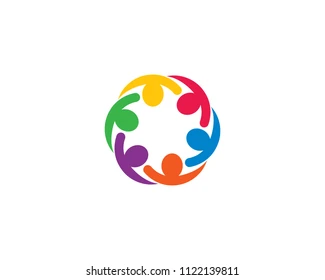

<h2><center>Ritah Nabaweesi, Olayinka Mogaji</center></h2>


## Table of Contents
-  #### Introduction 
-  #### Datasets
-  #### Data Cleaning
-  #### Guiding Question 1: What is the frequency of churn rate?
-  #### Guiding Question 2: How much is spent on mobile and internet services per individual?
-  #### Guiding Question 3: What is the relationship between the contract tenure and the churn rate?
-  #### Guiding Question 4: Which group of people are prone to churn?
-  #### Conclusion
-  #### What Next 
-  #### References & Appendix



### Introduction

 With a wide number of mobile and internet service providers to choose from in the market, **the profits of telecom companies are directly influenced by the retention rate of their existing clientele and the onboarding of new ones**. 
<br>
At the onset, individuals will choose one certain telecom company over another. However, as time progresses telecom subscribers leave their initial subscriber for another or choose to be multi subscribed. This project will focus on understanding the underlying drivers of telecom customer churn. 
<br>
Churn analysis is the evaluation of a company’s customer loss rate to reduce it. Also referred to as customer attrition rate, churn can be minimized by assessing your product and how people use it and from this understanding, it is evident that **churn is expensive for any business**.
<br>
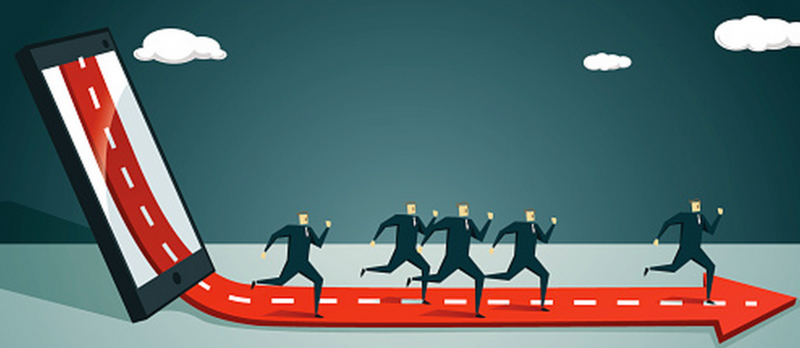
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import plotly.offline as py
import plotly.graph_objs as go

### Datasets

We are working with two data sets that were sourced from Maven Analytics which was originally sourced from IBM. This is an open source data set and does not require any licenses to access.

The data set is structured, in a tabular format. 

The telecom_customer_churn dataset contains specific information about each customer. The total customer base is 7043, with 38 attributes.

The second set is the telecom_zipcode population  which contains information on the estimated populations of the California zip codes in the customer_churn table. This was important for the analysis is it provided information about the company's footprint in this area.

The full set of raw data columns can be seen in the head of table below:



In [2]:
df1 = pd.read_csv("C:/Users/olayi/Documents/DATA601/Project/telecom_customer_churn.csv")
df1.head(4)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  

[4 rows x 38 columns]

In [3]:
df2 = pd.read_csv("C:/Users/olayi/Documents/DATA601/Project/telecom_zipcode_population.csv")
df2.head(4)

Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852

### Data Cleaning

We checked for columns with null values and returned the summary statatistics of the sum of missing values per column. 

Based on the outcome, in a bid to retain the integrity of customer information a decision was taken to drop the columns with the missing values as majority had string data that was not the focus of the study. The customer base was maintained at 7043 customers.

The column names were formatted to remove the spaces between the names for both tables and the two tables were joined on zip code as the unique ID.

A check was perfomed on the data types for the respective columns. Emphasis was on the columns that had numerical data, to confirm that they were either Int or Float as that's what would be based on to perform the numerical aspects of the analysis.



In [4]:
df1.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [5]:
df11 = df1.dropna(axis='columns')

In [6]:
df11.head(4)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   

   Zip Code   Latitude   Longitude  Number of Referrals  ...        Contract  \
0     93225  34.827662 -118.999073                    2  ...        One Year   
1     91206  34.162515 -118.203869                    0  ...  Month-to-Month   
2     92627  33.645672 -117.922613                    0  ...  Month-to-Month   
3     94553  38.014457 -122.115432                    1  ...  Month-to-Month   

  Paperless Billing   Payment Method Monthly Charge Total Charges  \
0               Yes      Credit Card           65.6        593.30   
1                No      Credit Card           -4.0        542.40   
2               Yes  Bank Withdrawal           73.9        280.85   
3               Yes  Bank Withdrawal           98.0       1237.85   

  Total Refunds Total Extra Data Charges  Total Long Distance Charges  \
0          0.00                        0                       381.51   
1         38.33                       10                        96.21   
2          0.00                        0                       134.60   
3          0.00                        0                       361.66   

   Total Revenue  Customer Status  
0         974.81           Stayed  
1         610.28           Stayed  
2         415.45          Churned  
3        1599.51          Churned  

[4 rows x 24 columns]

In [7]:
#print(df11.columns)

In [8]:
df11.columns = df11.columns.str.replace(" ","") #eliminate the spaces between the column names
df11.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'NumberofDependents', 'City',
       'ZipCode', 'Latitude', 'Longitude', 'NumberofReferrals',
       'TenureinMonths', 'Offer', 'PhoneService', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges',
       'TotalLongDistanceCharges', 'TotalRevenue', 'CustomerStatus'],
      dtype='object')

In [9]:
df2.head(4)

Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852

In [10]:
df2.isnull().sum()

Zip Code      0
Population    0
dtype: int64

In [11]:
print(df2.columns)

Index(['Zip Code', 'Population'], dtype='object')


In [12]:
df2.columns = df2.columns.str.replace(" ","")
#df2.columns 

- The two tables were merged on Zipcode as the unique identifier

In [13]:
merge_table = pd.merge(df11, df2, on="ZipCode")
merge_table

CustomerID  Gender  Age Married  NumberofDependents           City  \
0     0002-ORFBO  Female   37     Yes                   0   Frazier Park   
1     5183-SNMJQ    Male   32      No                   0   Frazier Park   
2     6847-KJLTS  Female   72     Yes                   0   Frazier Park   
3     8788-DOXSU    Male   46      No                   0   Frazier Park   
4     0003-MKNFE    Male   46      No                   0       Glendale   
...          ...     ...  ...     ...                 ...            ...   
7038  9396-ZSFLL  Female   64      No                   0    Carpinteria   
7039  9281-OFDMF    Male   76      No                   0  Meadow Valley   
7040  9494-MRNYX    Male   22      No                   0  Meadow Valley   
7041  9565-JSNFM    Male   39      No                   0  Meadow Valley   
7042  9972-EWRJS  Female   56     Yes                   1  Meadow Valley   

      ZipCode   Latitude   Longitude  NumberofReferrals  ...  \
0       93225  34.827662 -118.999073                  2  ...   
1       93225  34.827662 -118.999073                  0  ...   
2       93225  34.827662 -118.999073                  8  ...   
3       93225  34.827662 -118.999073                  0  ...   
4       91206  34.162515 -118.203869                  0  ...   
...       ...        ...         ...                ...  ...   
7038    93013  34.441398 -119.513163                  0  ...   
7039    95956  39.937017 -121.058043                  0  ...   
7040    95956  39.937017 -121.058043                  0  ...   
7041    95956  39.937017 -121.058043                  0  ...   
7042    95956  39.937017 -121.058043                  2  ...   

      PaperlessBilling    PaymentMethod MonthlyCharge TotalCharges  \
0                  Yes      Credit Card         65.60       593.30   
1                  Yes      Credit Card         95.10       865.10   
2                  Yes  Bank Withdrawal        100.40      5749.80   
3                  Yes  Bank Withdrawal         61.35      3645.50   
4                   No      Credit Card         -4.00       542.40   
...                ...              ...           ...          ...   
7038                No      Credit Card         48.85       631.40   
7039                No  Bank Withdrawal         90.70      3413.25   
7040                No  Bank Withdrawal         75.05       786.30   
7041               Yes  Bank Withdrawal         70.45      2597.60   
7042               Yes  Bank Withdrawal         19.25      1372.90   

     TotalRefunds TotalExtraDataCharges TotalLongDistanceCharges  \
0            0.00                     0                   381.51   
1           43.25                     0                   456.90   
2            0.00                     0                  2745.72   
3            0.00                     0                   572.30   
4           38.33                    10                    96.21   
...           ...                   ...                      ...   
7038        32.09                     0                   203.70   
7039         0.00                     0                   782.34   
7040         0.00                     0                   179.80   
7041         0.00                     0                  1280.98   
7042         0.00                     0                  3266.25   

      TotalRevenue  CustomerStatus  Population  
0           974.81          Stayed        4498  
1          1278.75          Stayed        4498  
2          8495.52          Stayed        4498  
3          4217.80          Stayed        4498  
4           610.28          Stayed       31297  
...            ...             ...         ...  
7038        803.01          Stayed       17409  
7039       4195.59          Stayed         301  
7040        966.10          Stayed         301  
7041       3878.58         Churned         301  
7042       4639.15          Stayed         301  

[7043 rows x 25 columns]

- We highlighted the area of focus for the guiding questions 
- The data wrangling was unique to each set of question so that was performed at the point of answering each of the guiding questions.

In [14]:
merge_table.loc[:5, ['CustomerID', 'Gender', 'Age', 'Married', 'MonthlyCharge', 'InternetService', 'PhoneService', 'TotalCharges', 'TotalRevenue', 'TotalRefunds', 'CustomerStatus']].style.set_properties(
    **{'background-color': 'lightgreen', 'color': 'darkblue', 'border-color': 'white'}
)

In [15]:
print(merge_table.columns)

Index(['CustomerID', 'Gender', 'Age', 'Married', 'NumberofDependents', 'City',
       'ZipCode', 'Latitude', 'Longitude', 'NumberofReferrals',
       'TenureinMonths', 'Offer', 'PhoneService', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges',
       'TotalLongDistanceCharges', 'TotalRevenue', 'CustomerStatus',
       'Population'],
      dtype='object')


### Guiding Question 1:
#### What is the frequency of churn rate?
The purpose of this question was that the view of the frequency of customers leaving the telecom will ultimately help the telecom company to forecast their revenue more accurately. The financial performance projections can be modified and factor in this information such that the performance projections closely mirror the actual outcome. 

The churn rate within the population can further inform the sales targets required to grow the client base of the telecom. 

### The Analysis
Inorder to assess how far reaching the attrition was, the assessment was done based on number of customers per sub-category in the Customer status and the contribution of each category to the overall revenue for the quarter.

The customer status has 3 subcategories: stayed, joined, and churned. These were sorted based on number of customers in each.
The Total revenue for each subcategory was computed and converted to thousands of US dollars. 

The outcome of the two was visualised in the form of a donut plot.



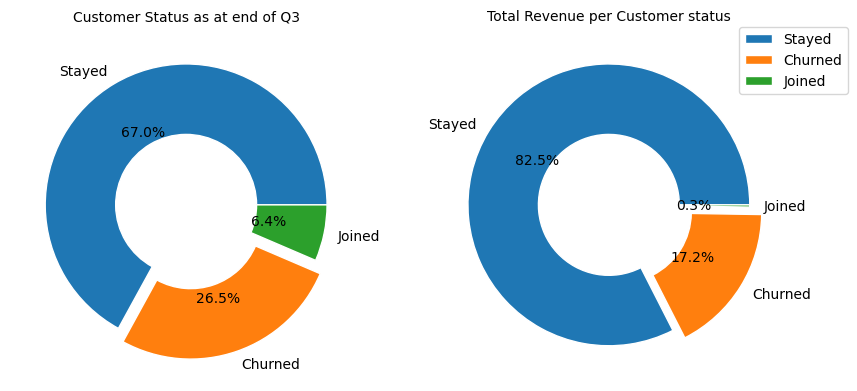

Status  Total Revenue 000USD
0   Stayed           17632.39212
1  Churned            3684.45982
2   Joined              54.27975

In [16]:
df_freq = merge_table.loc[:,['CustomerStatus','TotalRevenue']] 
status = np.array(df_freq.CustomerStatus)
uniq, freq = np.unique(status, return_counts = True) #number of clients per category
df_status = (dict(zip(uniq,freq)))
df_status = sorted(df_status.items(), key = lambda _:_[1], reverse = True) #sort the categories based on frequencies
df_status
df_revenue = dict(df_freq.set_index("CustomerStatus").groupby('CustomerStatus')['TotalRevenue'].sum()/1000) #revenue contribution from churned, joined and stayed
df_revenue = dict(sorted(df_revenue.items(), key = lambda _:_[1], reverse = True)) #sort the categories based on revenue contribution

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# create the donut chart for customer status
x, y = zip(*df_status)
wedges, labels, _ = ax[0].pie(y, labels=x, autopct='%.1f%%', explode=(0, 0.1, 0),
                              wedgeprops=dict(width=0.5, edgecolor='w'))

# set the labels font size
for label in labels:
    label.set_fontsize(10)

# set the title for the chart
ax[0].set_title('Customer Status as at end of Q3', fontsize=10)

# create the donut chart for total revenue
labels = df_revenue.keys()
sizes = df_revenue.values()
wedges, _, _ = ax[1].pie(sizes, labels=labels, autopct='%.1f%%', explode=(0, 0.1, 0),
                         wedgeprops=dict(width=0.5, edgecolor='w'))

# set the title for the chart
ax[1].set_title("Total Revenue per Customer status", fontsize=10)

# add legend to the plot
plt.legend(bbox_to_anchor=(0.85, 1.025), loc='upper left')

# display the plot
plt.show()

# display the data as a dataframe
pd.DataFrame(df_revenue.items(), columns=['Status', 'Total Revenue 000USD'])


### KEY OBSERVATIONS FROM THE PIE CHART :
During the quarter under review, 26.5% of the total 7042 customers discontinued their service with the telecom company. Despite this, the company was able to **maintain 67% of its previous customer base and saw a 6.4% increase in new customers**. However, the rate at which customers are leaving the company is higher than the rate at which they are joining.

These departures resulted in a **17.2% loss, or USD 3,684 ('000s)**, of the quarter's total revenue. This significant decrease should be considered when making financial projections for the next quarter. The modest contribution of 0.3%, or USD 54.28 ('000s), from new customers is not enough to offset the loss from customer churn.

*To ensure growth in the customer base and counteract the churn rate, the sales target should be set higher than 17.2%* .

### Guiding Question 2:
#### How much is spent on mobile and internet services per individual?
This guiding question was aimed at exploring the relationship between an individual's spending and the churn rate. We were curious whether those that spent the least were more likely to stay with the company as there the financial impact to the customer would be marginal or those that had a large monthly charge would be quick to leave the company.

Our hope was that the findings would guide the inform the pricing structure of the various product offering within the company.

#### The Analysis

To ease the search for the column names of interest, that merged table was transposed.
We identified the variables of interest as MonthlyCharge, TotalCharges and TenureinMonths and a quick computation of the key statistics; mean, median, standard deviation was done.

The outliers from both the both the monthly spend and quartely spend were removed. Outliers were taken as the data points more than 3 standard deviations from the mean. 
A view of the distribution of the spend on a monthly basis and quarterly spend was visualised using a histograms.

The aggregated Histograms didn't provide much information to guide decision making, so we drilled further to understand the spend per service type: phone service and internet service. 
We started off with a global view of the utilisation of the services across the board using boxplots and violin plots. Subsequently we analysed the monthly and quaterly spend on the two service lines for each customer status.

In [17]:
merge_table.head().T

0               1                2  \
CustomerID                  0002-ORFBO      5183-SNMJQ       6847-KJLTS   
Gender                          Female            Male           Female   
Age                                 37              32               72   
Married                            Yes              No              Yes   
NumberofDependents                   0               0                0   
City                      Frazier Park    Frazier Park     Frazier Park   
ZipCode                          93225           93225            93225   
Latitude                     34.827662       34.827662        34.827662   
Longitude                  -118.999073     -118.999073      -118.999073   
NumberofReferrals                    2               0                8   
TenureinMonths                       9              10               58   
Offer                             None         Offer D          Offer B   
PhoneService                       Yes             Yes              Yes   
InternetService                    Yes             Yes              Yes   
Contract                      One Year  Month-to-Month   Month-to-Month   
PaperlessBilling                   Yes             Yes              Yes   
PaymentMethod              Credit Card     Credit Card  Bank Withdrawal   
MonthlyCharge                     65.6            95.1            100.4   
TotalCharges                     593.3           865.1           5749.8   
TotalRefunds                       0.0           43.25              0.0   
TotalExtraDataCharges                0               0                0   
TotalLongDistanceCharges        381.51           456.9          2745.72   
TotalRevenue                    974.81         1278.75          8495.52   
CustomerStatus                  Stayed          Stayed           Stayed   
Population                        4498            4498             4498   

                                        3               4  
CustomerID                     8788-DOXSU      0003-MKNFE  
Gender                               Male            Male  
Age                                    46              46  
Married                                No              No  
NumberofDependents                      0               0  
City                         Frazier Park        Glendale  
ZipCode                             93225           91206  
Latitude                        34.827662       34.162515  
Longitude                     -118.999073     -118.203869  
NumberofReferrals                       0               0  
TenureinMonths                         59               9  
Offer                                None            None  
PhoneService                          Yes             Yes  
InternetService                       Yes             Yes  
Contract                         One Year  Month-to-Month  
PaperlessBilling                      Yes              No  
PaymentMethod             Bank Withdrawal     Credit Card  
MonthlyCharge                       61.35            -4.0  
TotalCharges                       3645.5           542.4  
TotalRefunds                          0.0           38.33  
TotalExtraDataCharges                   0              10  
TotalLongDistanceCharges            572.3           96.21  
TotalRevenue                       4217.8          610.28  
CustomerStatus                     Stayed          Stayed  
Population                           4498           31297

In [18]:
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                7043 non-null   object 
 1   Gender                    7043 non-null   object 
 2   Age                       7043 non-null   int64  
 3   Married                   7043 non-null   object 
 4   NumberofDependents        7043 non-null   int64  
 5   City                      7043 non-null   object 
 6   ZipCode                   7043 non-null   int64  
 7   Latitude                  7043 non-null   float64
 8   Longitude                 7043 non-null   float64
 9   NumberofReferrals         7043 non-null   int64  
 10  TenureinMonths            7043 non-null   int64  
 11  Offer                     7043 non-null   object 
 12  PhoneService              7043 non-null   object 
 13  InternetService           7043 non-null   object 
 14  Contract

- Categorize the dataframe into numeric and object datasets

In [19]:
numerics = ['float64', 'int64']
numeric_ds = merge_table.select_dtypes(include=numerics)
objects_ds = merge_table.select_dtypes(exclude=numerics)

In [20]:
numeric_ds.loc[:4, ['MonthlyCharge','TotalCharges', 'TenureinMonths']].style.set_properties(
    **{'background-color': 'lightgreen', 'color': 'darkblue', 'border-color': 'white'}
)

In [21]:
numeric_ds.describe()

Age  NumberofDependents       ZipCode     Latitude  \
count  7043.000000         7043.000000   7043.000000  7043.000000   
mean     46.509726            0.468692  93486.070567    36.197455   
std      16.750352            0.962802   1856.767505     2.468929   
min      19.000000            0.000000  90001.000000    32.555828   
25%      32.000000            0.000000  92101.000000    33.990646   
50%      46.000000            0.000000  93518.000000    36.205465   
75%      60.000000            0.000000  95329.000000    38.161321   
max      80.000000            9.000000  96150.000000    41.962127   

         Longitude  NumberofReferrals  TenureinMonths  MonthlyCharge  \
count  7043.000000        7043.000000     7043.000000    7043.000000   
mean   -119.756684           1.951867       32.386767      63.596131   
std       2.154425           3.001199       24.542061      31.204743   
min    -124.301372           0.000000        1.000000     -10.000000   
25%    -121.788090           0.000000        9.000000      30.400000   
50%    -119.595293           0.000000       29.000000      70.050000   
75%    -117.969795           3.000000       55.000000      89.750000   
max    -114.192901          11.000000       72.000000     118.750000   

       TotalCharges  TotalRefunds  TotalExtraDataCharges  \
count   7043.000000   7043.000000            7043.000000   
mean    2280.381264      1.962182               6.860713   
std     2266.220462      7.902614              25.104978   
min       18.800000      0.000000               0.000000   
25%      400.150000      0.000000               0.000000   
50%     1394.550000      0.000000               0.000000   
75%     3786.600000      0.000000               0.000000   
max     8684.800000     49.790000             150.000000   

       TotalLongDistanceCharges  TotalRevenue     Population  
count               7043.000000   7043.000000    7043.000000  
mean                 749.099262   3034.379056   22139.603294  
std                  846.660055   2865.204542   21152.392837  
min                    0.000000     21.360000      11.000000  
25%                   70.545000    605.610000    2344.000000  
50%                  401.440000   2108.640000   17554.000000  
75%                 1191.100000   4801.145000   36125.000000  
max                 3564.720000  11979.340000  105285.000000

In [22]:
objects_ds.describe()

CustomerID Gender Married         City Offer PhoneService  \
count         7043   7043    7043         7043  7043         7043   
unique        7043      2       2         1106     6            2   
top     0002-ORFBO   Male      No  Los Angeles  None          Yes   
freq             1   3555    3641          293  3877         6361   

       InternetService        Contract PaperlessBilling    PaymentMethod  \
count             7043            7043             7043             7043   
unique               2               3                2                3   
top                Yes  Month-to-Month              Yes  Bank Withdrawal   
freq              5517            3610             4171             3909   

       CustomerStatus  
count            7043  
unique              3  
top            Stayed  
freq             4720

In [23]:
objects_ds.groupby('CustomerStatus').size()

CustomerStatus
Churned    1869
Joined      454
Stayed     4720
dtype: int64

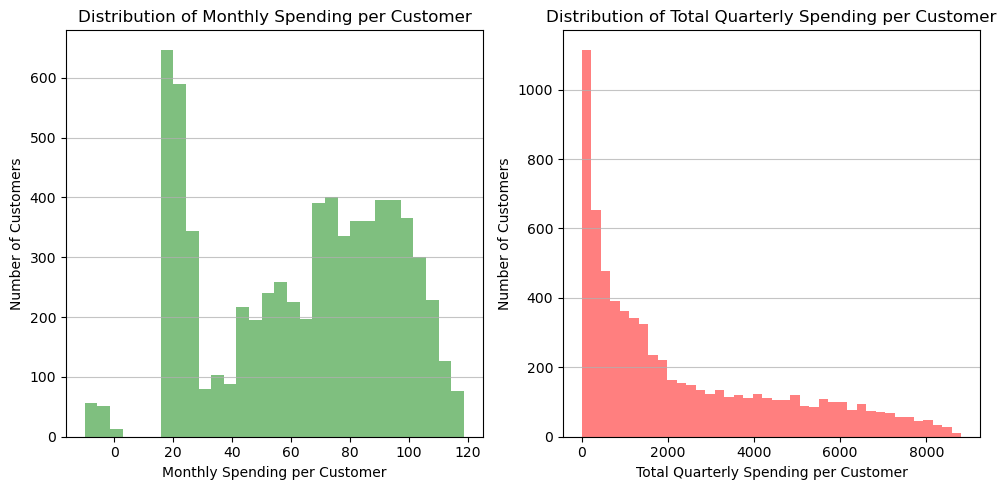

In [24]:

# Group the merge_table DataFrame by CustomerID and sum the MonthlyCharge and TotalCharges columns
spending_per_customer = merge_table.groupby('CustomerID').sum()[['MonthlyCharge', 'TotalCharges']]

# Calculate the total monthly spending per customer
spending_per_customer['TotalMonthlySpending'] = spending_per_customer['MonthlyCharge'] + spending_per_customer['TotalCharges']

# Generate example data
total_monthly_spending = spending_per_customer['TotalMonthlySpending']

# performing a data filtering operation and remove outliers (data points more than 3 standard deviations from the mean)


total_monthly_spending = total_monthly_spending[total_monthly_spending.between(total_monthly_spending.mean()-3*total_monthly_spending.std(), total_monthly_spending.mean()+3*total_monthly_spending.std())]

# Sort the monthly charges in ascending order
spending_per_customer = spending_per_customer.sort_values(by='MonthlyCharge', ascending=True)
monthly_spending = spending_per_customer['MonthlyCharge']

# Create a histogram of the total monthly spending per customer
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(monthly_spending, bins=30, color='green', alpha=0.5)
ax1.set_xlabel('Monthly Spending per Customer')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Distribution of Monthly Spending per Customer')
ax1.grid(axis='y', alpha=0.75)

# Create a histogram of the total monthly spending per customer
ax2.hist(total_monthly_spending, bins=40, color='red', alpha=0.5)
ax2.set_xlabel('Total Quarterly Spending per Customer')
ax2.set_ylabel('Number of Customers')
ax2.set_title('Distribution of Total Quarterly Spending per Customer')
ax2.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


#### Key Highlights
For the current month, majority of the customers will be charged USD 20
Total charges for the current qaurter are concentrated in the under USD 1,000

<br>


- A quick computation of summary statistics

In [25]:
mean_spending =  numeric_ds["MonthlyCharge"].mean()
rounded_mean_spending = round(mean_spending, 2)
print(rounded_mean_spending)
print("\n")

median_spending = numeric_ds["MonthlyCharge"].median()
rounded_median_spending = round(median_spending, 2)
print(rounded_median_spending)
print("\n")

std_spending = numeric_ds["MonthlyCharge"].std()
rounded_std_spending = round(std_spending, 2)
print(rounded_std_spending)
print("\n")

var_spending = numeric_ds["MonthlyCharge"].var()
rounded_var_spending = round(var_spending, 2)
print(rounded_var_spending)


63.6


70.05


31.2


973.74


-  The standard deviation gives an estimate of how much the data deviates from the mean on average. If the standard deviation is high, it means that the data values are spread out over a larger range of values, while a low standard deviation means that the data values are more closely centered around the mean. The variance is simply the square of the standard deviation. It gives an idea of how far the data values are spread out from the mean.
-  In this case, a standard deviation of 44.76 and a variance of 2003.26 suggest that the monthly spending per customer data is spread out over a relatively large range, with values deviating significantly from the mean of 96.14.

<br>


- The analysis of monthly and quarterly spend at service level follows

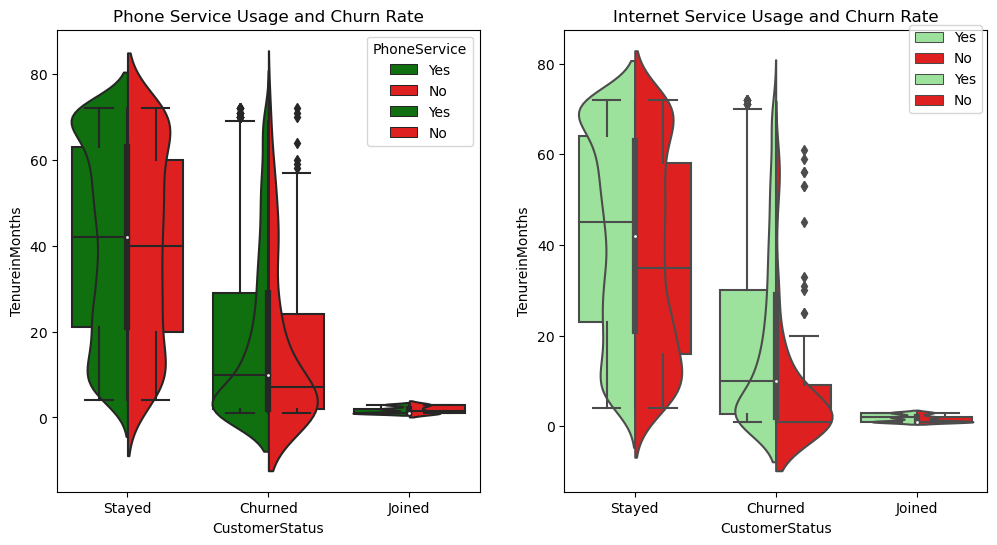

In [26]:
import seaborn as sns

# Create a new figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))


# Set the color palette
colors = ['green', 'red']

# Plot violinplot and boxplot for phone service usage
sns.violinplot(x='CustomerStatus', y='TenureinMonths', hue='PhoneService', data=merge_table, split=True, palette=colors, ax=axs[0])
sns.boxplot(x='CustomerStatus', y='TenureinMonths', hue='PhoneService', data=merge_table, palette=colors, ax=axs[0])

axs[0].set_title('Phone Service Usage and Churn Rate')
axs[0].set_xlabel('CustomerStatus')
axs[0].set_ylabel('TenureinMonths')


# Set the color palette
colors = ['lightgreen', 'red']

# Plot violinplot and boxplot for internet service usage
sns.violinplot(x='CustomerStatus', y='TenureinMonths', hue='InternetService', data=merge_table, split=True, palette=colors, ax=axs[1])
sns.boxplot(x='CustomerStatus', y='TenureinMonths', hue='InternetService', data=merge_table, palette=colors, ax=axs[1])

axs[1].set_title('Internet Service Usage and Churn Rate')
axs[1].set_xlabel('CustomerStatus')
axs[1].set_ylabel('TenureinMonths')
plt.legend(bbox_to_anchor=(0.80, 1.025), loc='upper left')

# Show the plot
plt.show()


#### Key Observations
**Phone service:** For the customers that stayed, the ratio of customers subscribed to the phone service closely mirrors the ratio of non subscribers across tenures. The churned group potrays similar behaviour with slight variations in the medians.

The churned group is concentrated in the lower tenures

**Internet service:** For the stayed category, subscriptions across the tenures to the internet service is similar to what was observed under phone service. The same applies to the churned category.


<br>




- The monthly and quarterly spend across the phone and internet service follows:

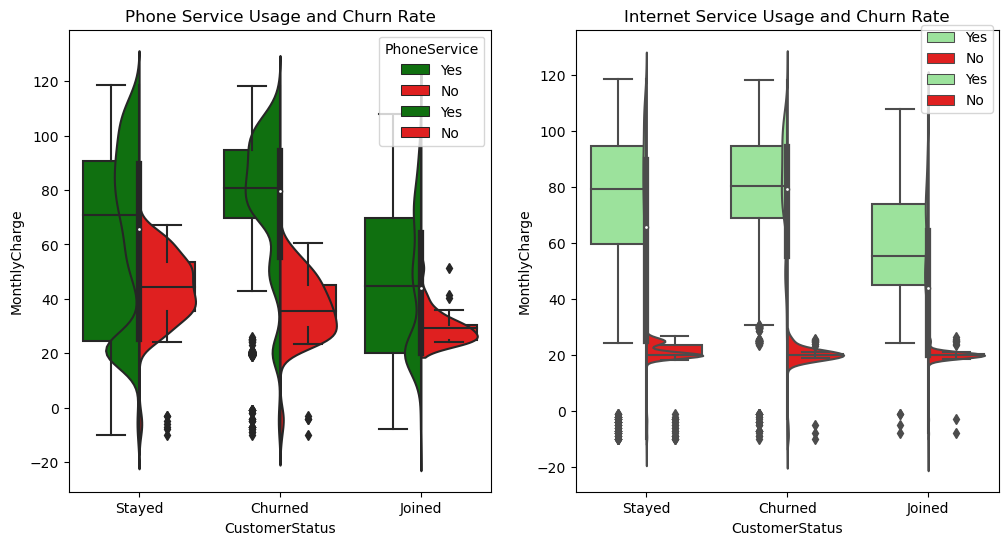

In [27]:
import seaborn as sns

# Create a new figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))


# Set the color palette
colors = ['green', 'red']

# Plot violinplot and boxplot for phone service usage
sns.violinplot(x='CustomerStatus', y='MonthlyCharge', hue='PhoneService', data=merge_table, split=True, palette=colors, ax=axs[0])
sns.boxplot(x='CustomerStatus', y='MonthlyCharge', hue='PhoneService', data=merge_table, palette=colors, ax=axs[0])

axs[0].set_title('Phone Service Usage and Churn Rate')
axs[0].set_xlabel('CustomerStatus')
axs[0].set_ylabel('MonthlyCharge')


# Set the color palette
colors = ['lightgreen', 'red']

# Plot violinplot and boxplot for internet service usage
sns.violinplot(x='CustomerStatus', y='MonthlyCharge', hue='InternetService', data=merge_table, split=True, palette=colors, ax=axs[1])
sns.boxplot(x='CustomerStatus', y='MonthlyCharge', hue='InternetService', data=merge_table, palette=colors, ax=axs[1])

axs[1].set_title('Internet Service Usage and Churn Rate')
axs[1].set_xlabel('CustomerStatus')
axs[1].set_ylabel('MonthlyCharge')
plt.legend(bbox_to_anchor=(0.80, 1.025), loc='upper left')

# Show the plot
plt.show()


### KEY OBSERVATIONS FROM THE VIOLIN/BOXPLOT  CHART

- For phone service: Across the three categories, the churned category has the highest median spend of approximately USD 80, those that stayed have a median monthly spend of USD 70 while those that joined have a median spend of USD 50. The minimum spend for the churned group is USD 40 which is higher than the minimum spend for both stayed and joined category
<br>

- Internet service: median spend for those that stayed and those that churned is almost equal hence the impact of churn might not be felt in the initial stages. The joined category is coming in at a lower median spend than the existing. In the long run, the impact of churn will be evident given the disparity in existing spend Vs the new joiners.
<br>

- The service line whose bottom line will be impacted the most will the Phone service, as they are losing their high spenders. The contribution of the joiners doesn’t match what is being lost in churn.


### Guiding Question 3 : What is the relationship between the contract type and the churn rate?
We set out to analyze the composition of the subscription tenures available to customers and explore the relationship between tenure and churn rate. 
Based on the tenures, we hoped to profile the customers as either low or high risk. The findings would then inform the telecom company of the focus group and devise ways of converting them. This would further inform the sales representatives on the plan to emphasize during the sales.

### The Analysis
The contract_type initially had the labels: Month-to-Month, One Year, and Two year. The data set was sorted on the Contract column and the conversion of the contarct labels done using the map function. 
Month-to-Month : 1
One Year : 2
Two Year: 3

In [28]:
merge_table2 = merge_table.copy()

c_map = {'Month-to-Month': 0, 'One Year': 1, 'Two Year': 2} #create dictionary to map contract types to values
merge_table2['contract_type'] = merge_table2['Contract'].map(c_map) #map the contract types to the values
display(merge_table2[['Contract','contract_type']])

Contract  contract_type
0           One Year              1
1     Month-to-Month              0
2     Month-to-Month              0
3           One Year              1
4     Month-to-Month              0
...              ...            ...
7038  Month-to-Month              0
7039        Two Year              2
7040  Month-to-Month              0
7041        One Year              1
7042        Two Year              2

[7043 rows x 2 columns]

In [29]:
df_tenure = merge_table2.loc[:,['CustomerStatus','contract_type']]
df_tenure.head(4)

CustomerStatus  contract_type
0         Stayed              1
1         Stayed              0
2         Stayed              0
3         Stayed              1

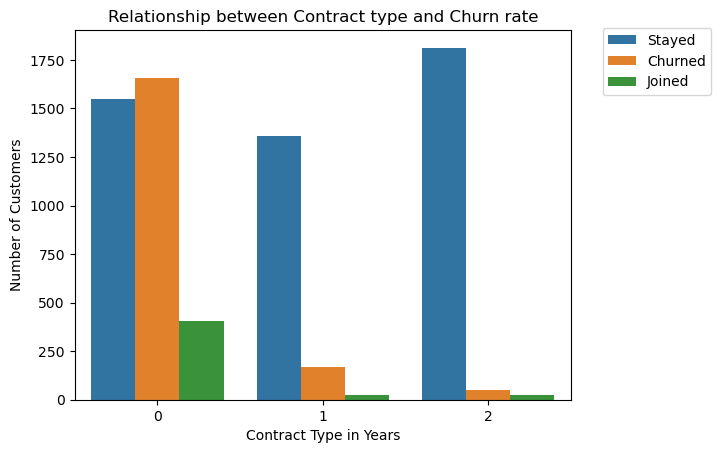

In [30]:
sns.countplot(x='contract_type', hue='CustomerStatus', data=df_tenure)
plt.title("Relationship between Contract type and Churn rate")
plt.xlabel("Contract Type in Years")
plt.ylabel("Number of Customers")
plt.legend(bbox_to_anchor=(1.05, 1.025), loc='upper left')
plt.show()

## KEY OBSERVATIONS 
- People with the Month-to-month contract have the highest churn rate while people with One year and 2year contract are stable within the network. 

<br>

## Guiding Question 4
### Which group of people are prone to churn?
The objective of this question was to assess whether a particular category of customers of customers was leaving the company. 
The outcome of the visualised trends would then inform the marketing team on the target audience, with the ultimate goal of winning back the lost customers. 
The marketing material; the nature of advertisements that are broadcast can be structured to appeal to a certain category of people, with the goal of converting them into subscribers.



### The Analysis
Based on Age, the customer base was grouped as young, middle aged or senior. 
- Young : 0-30
- Middle-aged: 31-60
- Senior: Above 60


The available Gender categories in the dataset were Male and Female and these were maintained.

On the marital status; customers indicated Married with Yes and not married as No. This was also maintained.

For the Age, gender, and marital status, we computed the churn rate for each sub-category as a percentage of the entire customer base and visualized this using bar graphs

To further assess the footprint of the customers that were churning, we grouped the churn rate per city and mapped against the California map using folium library and geomaps.



In [31]:
merge_table['AgeBin'] = pd.cut(merge_table['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])
age_churn_rate = merge_table.groupby(['AgeBin'])['CustomerStatus'].apply(lambda x: (x == 'Churned').mean()).reset_index()
age_churn_rate

AgeBin  CustomerStatus
0        Young        0.223676
1  Middle-aged        0.239097
2       Senior        0.364621

In [32]:
fig = px.bar(age_churn_rate, x='AgeBin', y='CustomerStatus', color='AgeBin', title='Churn Rate by Age Group',
labels=dict(AgeBin="Age Bracket", CustomerStatus="Attrition Rate"))
fig.show()

- 36.5% of the senior customers are leaving the network, 23.9% from the Middle-aged group, and 22% from the Young customers.

<br>


In [33]:
gender_churn_rate = merge_table.groupby(['Gender'])['CustomerStatus'].apply(lambda x: (x == 'Churned').mean()).reset_index()
gender_churn_rate

Gender  CustomerStatus
0  Female        0.269209
1    Male        0.261603

In [34]:
fig = px.bar(gender_churn_rate, x='Gender', y='CustomerStatus', color='Gender', title='Churn Rate by Gender',labels=dict(Gender="Gender", CustomerStatus="Attrition Rate"))
             
fig.show()

- The attrition rate is approximately evenly distributed at 26% and 27% among the Male and Female customers respectively.

In [35]:
married_churn_rate = merge_table.groupby(['Married'])['CustomerStatus'].apply(lambda x: (x == 'Churned').mean()).reset_index()
married_churn_rate

Married  CustomerStatus
0      No        0.329580
1     Yes        0.196649

In [36]:
fig = px.bar(married_churn_rate, x='Married', y='CustomerStatus', color='Married', title='Churn Rate by Marital Status',
             labels=dict(Married="Married", CustomerStatus="Attrition Rate"))
fig.show()

- On the marital status level, the company is loosing 33% of the unmarried customer base and 19.6% of it's unmarried customer base. 

<br>


- The distribution of churn across the cities of California follows:

In [37]:
#merge_table 
merge_table_churn = merge_table.query("CustomerStatus=='Churned'") #filter out the customers that actually churned 
merge_table_churn.head(3)

CustomerID  Gender  Age Married  NumberofDependents      City  ZipCode  \
5  1918-ZBFQJ  Female   48      No                   3  Glendale    91206   
6  4597-ELFTS    Male   57      No                   0  Glendale    91206   
7  6365-MTGZX    Male   44      No                   0  Glendale    91206   

    Latitude   Longitude  NumberofReferrals  ...    PaymentMethod  \
5  34.162515 -118.203869                  0  ...  Bank Withdrawal   
6  34.162515 -118.203869                  0  ...  Bank Withdrawal   
7  34.162515 -118.203869                  0  ...  Bank Withdrawal   

  MonthlyCharge TotalCharges TotalRefunds TotalExtraDataCharges  \
5         79.25      1111.65        48.25                     0   
6         24.90      1334.00         0.00                     0   
7         96.00      2122.45         0.00                     0   

  TotalLongDistanceCharges TotalRevenue  CustomerStatus  Population  \
5                   436.02      1499.42         Churned       31297   
6                   144.48      1478.48         Churned       31297   
7                   594.24      2716.69         Churned       31297   

        AgeBin  
5  Middle-aged  
6  Middle-aged  
7  Middle-aged  

[3 rows x 26 columns]

In [38]:
merge_table_churn_map = merge_table_churn.loc[:,['City', 'ZipCode', 'Latitude', 'Longitude', 'Population', 'CustomerStatus' ]]
merge_table_churn_map.head(3)

City  ZipCode   Latitude   Longitude  Population CustomerStatus
5  Glendale    91206  34.162515 -118.203869       31297        Churned
6  Glendale    91206  34.162515 -118.203869       31297        Churned
7  Glendale    91206  34.162515 -118.203869       31297        Churned

In [39]:
merge_table_churn_map.loc[:12, ['City', 'ZipCode', 'Latitude', 'Longitude', 'Population', 'CustomerStatus']].style.set_properties(
    **{'background-color': 'lightgreen', 'color': 'darkred', 'border-color': 'white'}
)

In [40]:

# Create a new DataFrame that only contains rows where the customer has churned
#churned_customers = merge_table_churn_map[merge_table_churn_map['CustomerStatus'] == 'Churned']
#churned_customers = 
#merge_table_churn_map
# Calculate the total number of customers
total_customers = merge_table.shape[0]
#total_customers
# Calculate the number of churned customers
#churned_customers_count = churned_customers.shape[0]

# Calculate the Churn Rate
#Churn_rate = (churned_customers_count / total_customers) * 100
#Churn_rate

# Calculate the Churn Rate by city
#churn_rate_by_city = churned_customers_count / total_customers

# Add the Churn Rate to the original dataframe
#merge_table['Churn Rate'] = churn_rate_by_city
#churn_rate_by_city
# Sort the dataframe by Churn Rate to get the 20 cities with the highest Churn Rate
#top_20_cities = merge_table.sort_values(by='Churn Rate', ascending=False).head(20)
#top_20_cities.head(10)






In [41]:
map.save("map.html")
import webbrowser
webbrowser.open("map.html")

AttributeError: type object 'map' has no attribute 'save'

In [42]:
# Create a new DataFrame that only contains rows where the customer has churned
churned_customers = merge_table_churn_map[merge_table_churn_map['CustomerStatus'] == 'Churned']

# Calculate the total number of customers
total_customers = merge_table.shape[0]

# Calculate the number of churned customers
churned_customers_count = churned_customers.shape[0]

# Calculate the Churn Rate
Churn_rate = (churned_customers_count / total_customers) * 100
#Churn_rate

# Calculate the Churn Rate by city
churn_rate_by_city = churned_customers_count / total_customers

# Add the Churn Rate to the original dataframe
merge_table['Churn Rate'] = churn_rate_by_city
#churn_rate_by_city
# Sort the dataframe by Churn Rate to get the 20 cities with the highest Churn Rate
top_20_cities = merge_table.sort_values(by='Churn Rate', ascending=False).head(20)
top_20_cities.head(4)

CustomerID  Gender  Age Married  NumberofDependents          City  \
0     0002-ORFBO  Female   37     Yes                   0  Frazier Park   
4691  2302-ANTDP  Female   76     Yes                   0     Hat Creek   
4702  2320-SLKMB  Female   46      No                   0         Baker   
4701  7733-UDMTP  Female   65      No                   0        Fresno   

      ZipCode   Latitude   Longitude  NumberofReferrals  ...  MonthlyCharge  \
0       93225  34.827662 -118.999073                  2  ...          65.60   
4691    96040  40.789799 -121.474529                  9  ...         117.45   
4702    92309  35.289520 -116.092214                  0  ...          44.45   
4701    93726  36.793601 -119.761131                  0  ...          55.00   

     TotalCharges TotalRefunds TotalExtraDataCharges TotalLongDistanceCharges  \
0          593.30          0.0                     0                   381.51   
4691      5438.90          0.0                     0                  2065.92   
4702      1183.80          0.0                     0                     0.00   
4701      3094.05          0.0                     0                     0.00   

     TotalRevenue CustomerStatus  Population       AgeBin  Churn Rate  
0          974.81         Stayed        4498  Middle-aged     0.26537  
4691      7504.82        Churned         397       Senior     0.26537  
4702      1183.80         Stayed         904  Middle-aged     0.26537  
4701      3094.05         Stayed       39148       Senior     0.26537  

[4 rows x 27 columns]

In [43]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around California
map = folium.Map(location=[37.296933, -121.9574983], zoom_start=7)

# Create an Interactive Marker cluster for all cities
marker_cluster = MarkerCluster().add_to(map)

# Add markers for each city
for index, row in merge_table_churn_map.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['City'],        
        ).add_to(marker_cluster)


map.save("map.html")
import webbrowser
webbrowser.open("map.html")

True

In [44]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around California
map = folium.Map(location=[37.296933, -121.9574983], zoom_start=7)

# Create an Interactive Marker cluster for all cities
marker_cluster = MarkerCluster().add_to(map)

# Add markers for each city
for index, row in merge_table.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['City'],        
        ).add_to(marker_cluster)

# Create a separate Interactive Marker cluster for the 20 cities with the highest Churn Rate
top_20_cities_marker_cluster = MarkerCluster().add_to(map)

# Add markers for each of the 20 cities
for index, row in top_20_cities.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['City'],
        icon=folium.Icon(color='red',icon='info-sign')
        ).add_to(top_20_cities_marker_cluster)    

map.save("map.html")
import webbrowser
webbrowser.open("map.html")

True

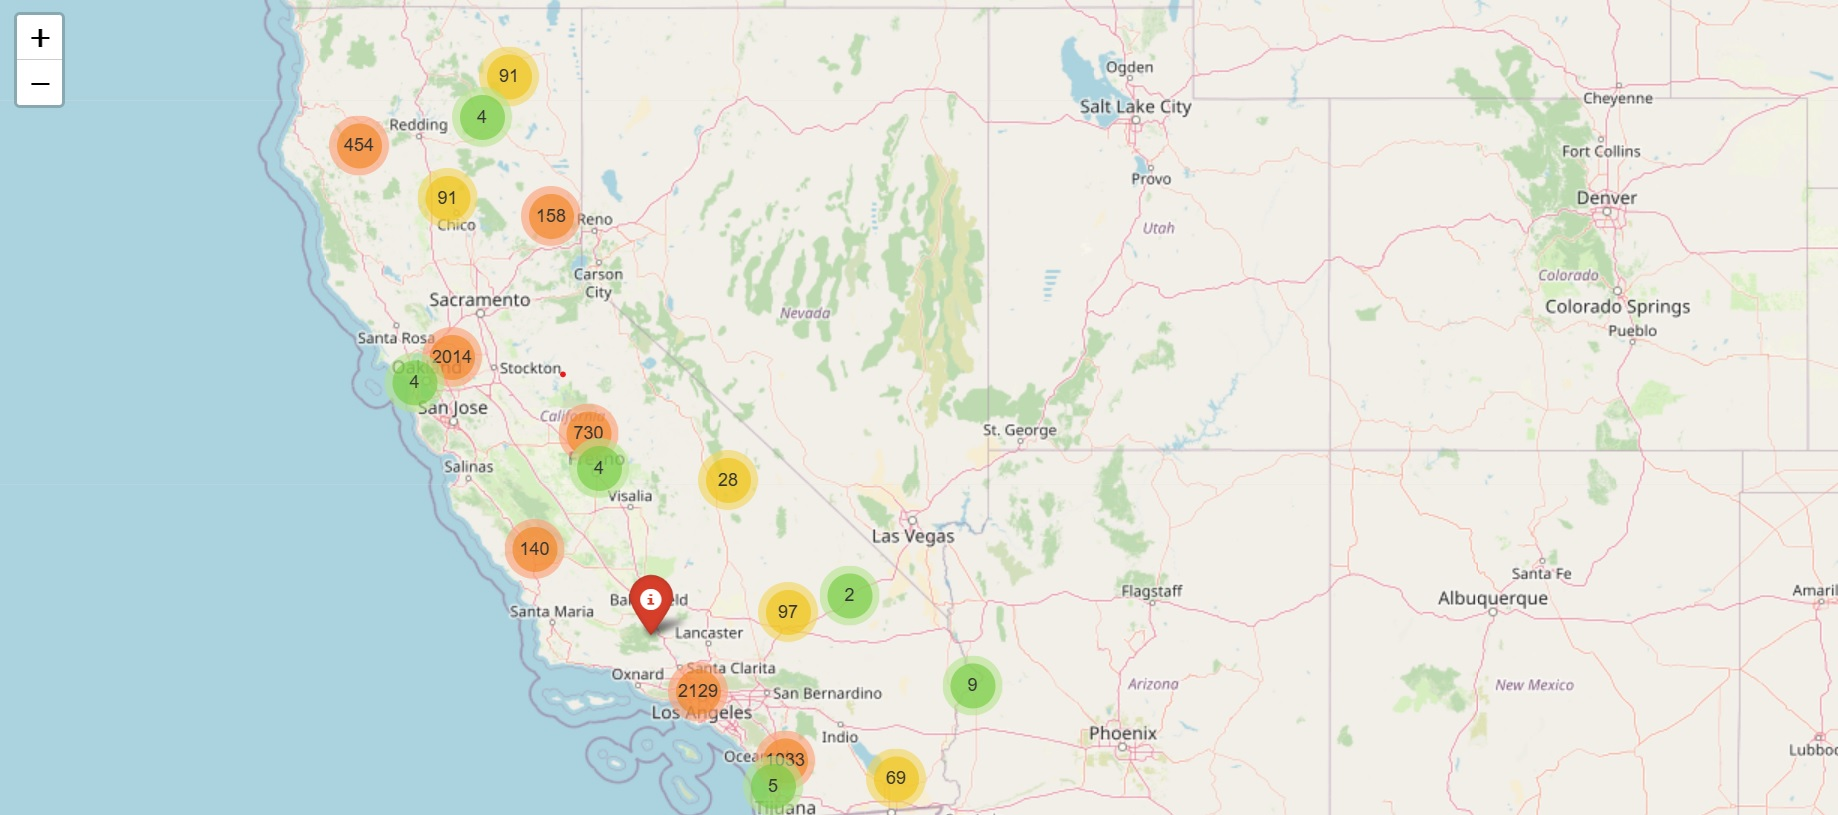

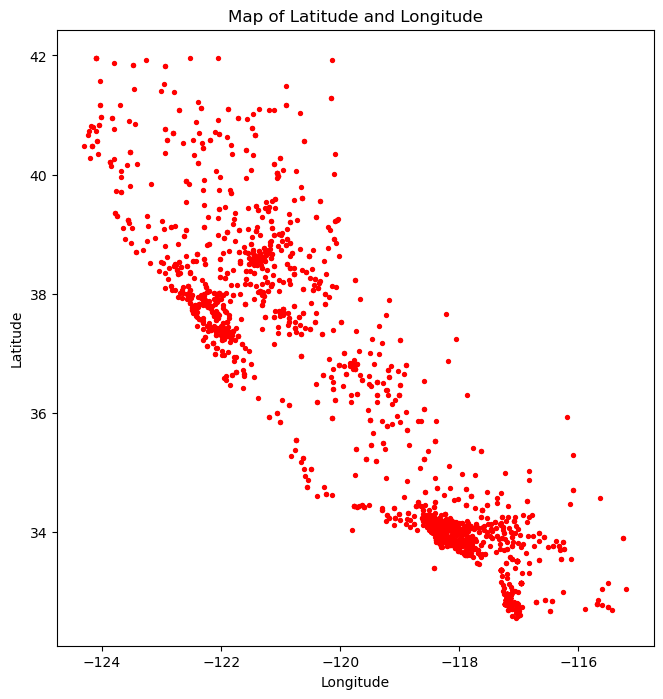

In [45]:
# Create a GeoDataFrame from the data
geo_df = gpd.GeoDataFrame(merge_table_churn_map, geometry=gpd.points_from_xy(merge_table_churn_map['Longitude'], merge_table_churn_map['Latitude']))

# Plot the map
geo_df.plot(markersize=8, color='red', figsize=(10, 8))
plt.title("Map of Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### KEY OBSERVATIONS ON GROUP OF PEOPLE THAT CHURN THE MOST 
Based on the analysis above, we can inferred that the category of people the company should focus on are:
- The senior citizen
- Unmarried people 
- The Maps showed the cities where people churned the most in the network.
<br>


- Bonus Questions: Referrals Effect and Monthly and Total Charges on Churn Rate

In [46]:
# Create a copy of the merge_table to prevent changes to the original data
merge_table_copy = merge_table.copy()

merge_table_copy["TotalCharges"] = merge_table_copy["TotalCharges"].astype(float)

merge_table_copy["CustomerStatus"] = merge_table_copy["CustomerStatus"].astype("category")

colors = {"Churned": "orangered", "Stayed": "lightgreen", "Joined": "skyblue"}

# Create an interactive scatter plot
fig = px.scatter(merge_table_copy, x="MonthlyCharge", y="TotalCharges", color="CustomerStatus", 
                 size="NumberofReferrals", hover_name="CustomerID", size_max=40,
                 title="Relationship between Monthly Charge, Total Charges, Referrals and Churn rate",
                 color_discrete_map=colors)

# Show the plot
fig.show()


- Customers who have churned are the high spenders in the customer base; tend to have higher total charges for any given monthly charge compared to those who have stayed or joined. 

In [48]:
merge_table_interphone = merge_table.loc[:,['NumberofReferrals', 'TotalCharges', 'MonthlyCharge', 'TenureinMonths', 'CustomerStatus']]
merge_table_interphone.set_index( 'CustomerStatus' , inplace=True)
merge_table_interphone
variables = ['NumberofReferrals', 'MonthlyCharge', 'TenureinMonths']

data = [ 
    {'type' : 'violin', 'y': merge_table_interphone.loc[status, var], 'box' : {'visible' : True}, 'meanline': {'visible' : True}, 'name' : f'{status} {var}'} 
    for status in merge_table_interphone.index.unique() for var in variables
]

py.iplot(data)



### Key Observation
- On average, the customers that stayed have referred 3 people to the company. Maximum number of referrals is 11 people for that   still with the company. 
- The churned category on the other hand barely made referrals, with an average of 1 person for the quarter. 
- It’s highly unlikely that the customers that are leaving the company will encourage those that they interact with to join the company. The potential brand ambassadors (the churned) are an angry lot.

### Conclusion 

- The telecom company should focus on understanding why new customers are leaving before their 1 year anniversary, as the highest attrition is happening among those who have spent between 0-6 months with the company. 

- Long-standing customers also need attention, as those who have spent over 3 years with the company are second in line among those who are churning. 

- There should be continuous engagement with new customers and seeking their feedback can help keep them with the company longer. 

- Each customer that leaves the company costs between USD 1,280.17 and USD 1,802.83 per quarter. Action should be taken to minimize this cost as it ultimately affects the bottom line.

- The service line that will be impacted the most in the long run is the phone services as it is loosing it's high spenders.

- The offering for the Month-to-Month contract can be reviewed to ensure that customers are retained.




### Lessons learned, the insight  gained, and suggestions for future modeling and exploration opportunities.




Understand the purpose of team work and how to agree on project topic and assign tasks to each member.

Understand the business problem and objectives: Before you start any analysis, it's essential to understand the business problem and objectives, as well as the data you are working with. This will help you frame the analysis and the insights in a way that is most useful to the business.

Data cleaning and preparation: Data cleaning and preparation are critical to churn analysis. We removed missing data, and inconsistencies, and ensure that the data is in the right format and ready for analysis.

Exploratory Data Analysis (EDA): Conducting an EDA is an important step in understanding the data and identifying trends and patterns that can be useful in the analysis.

Interpret the results: The insights and recommendations you provide based on the analysis should be actionable and easy to understand by the business. It's also essential to communicate the results and findings effectively to stakeholders.

#### Some suggestions for future modeling and exploration opportunities include:

Use advanced machine learning algorithms such as gradient boosting, neural networks, or deep learning to improve the model's accuracy and prediction power.

Conduct cohort analysis to understand the behavior of different groups of customers, such as new vs. returning customers or high vs. low-value customers.

Use Natural Language Processing (NLP) techniques to analyze customer feedback and reviews to understand the root causes of churn and identify opportunities to improve customer experience.



### Hints:
Dummy Encoding transforms of each categorical feature into new columns with a 1 (True) or 0 (False)

Split our data into training and testing using Logistic Regression Model using *sklearn.linear_model library*

Finally create the Confusion Matrix Visualization.




#### REFERENCES
- https://www.paddle.com/resources/customer-churn-analysis
- https://www.mavenanalytics.io/data-playground
- https://seaborn.pydata.org/tutorial/introduction
- https://pypi.org/project/folium/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Export-to-LaTeX
- https://www.shutterstock.com/search/teamwork-symbol